# Introducción a las redes neuronales profundas
# Proyecto 2 

Clasificar los vectores x1 y x2 usando backpropagation en una red neuronal shallow, para ello usar los siguientes métodos:

1. Usando SDBP
2. Método de momento
3. Método de Levenberg-Marquardt

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.utils import to_categorical
from neupy import algorithms, layers
from neupy import plots
%matplotlib inline

Using TensorFlow backend.


In [2]:
x1 = np.array([[-4,-3],[-4,-1],[-3,-3],[-3,-1],[-3,0],[-2,-2],[0,-1],[1,-1],[1,0],[1,2],
               [2,-1],[2,1],[2,2],[2,3],[2,4],[3,-4],[3,-3],[3,-2],[3,-1],[4,-1]])

x2 = np.array([[-1,-4],[-1,-3],[-1,2],[-1,3],[-1,4],[0,-4],[0,-3],[0,2],[1,-5],[1,-4],
               [1,4],[3,2],[3,3],[4,1],[4,2]])

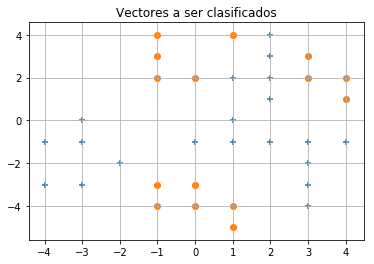

In [3]:
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Vectores a ser clasificados')
plt.grid(True)
plt.show()

In [4]:
X = np.concatenate((x1, x2))
y = np.concatenate((np.ones(20), np.zeros(15)))
y_binary = to_categorical(y)

### Método SDBP

En el método de la retropropagación, el error de la capa de salida se propaga hacia atras hasta llegar a la última capa, para actualizar los pesos y los sesgos, reduciendo asi el error.

La actualización de los pesos se realiza en la direccion opuesta al máximo incremento, usando el gradiente descendiente de la función de error con respecto a los parametros.

La actualización de los parámetros de la red neuronal se realizan de la siguiente manera:

$$w_{t+1} = w_t - \nabla w_t$$
$$b_{t+1} = b_t - \nabla w_t $$

$$\nabla w_t = -\epsilon \nabla_w E(w_t)$$



In [5]:
net1 = Sequential()
net1.add(Dense(30, activation='tanh', input_shape=(2,)))
net1.add(Dense(30, activation='relu'))
net1.add(Dense(2, activation='softmax'))

In [6]:
net1.compile(optimizer=SGD(lr=0.005), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [7]:
net1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 62        
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________


In [8]:
history1 = net1.fit(X, y_binary, epochs=100, batch_size=1)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.8581 - acc: 0.6000
Epoch 2/100
35/35 [==============================] - 0s 830us/step - loss: 0.7168 - acc: 0.6571
Epoch 3/100
35/35 [==============================] - 0s 965us/step - loss: 0.6471 - acc: 0.6286
Epoch 4/100
35/35 [==============================] - 0s 941us/step - loss: 0.6094 - acc: 0.6857
Epoch 5/100
35/35 [==============================] - 0s 860us/step - loss: 0.5823 - acc: 0.7143
Epoch 6/100
35/35 [==============================] - 0s 829us/step - loss: 0.5633 - acc: 0.7429
Epoch 7/100
35/35 [==============================] - 0s 847us/step - loss: 0.5436 - acc: 0.7429
Epoch 8/100
35/35 [==============================] - 0s 760us/step - loss: 0.5337 - acc: 0.8000
Epoch 9/100
35/35 [==============================] - 0s 800us/step - loss: 0.5204 - acc: 0.7714
Epoch 10/100
35/35 [==============================] - 0s 891us/step - loss: 0.5077 - acc: 0.8000
Epoch 11/100
35/35 [=====================

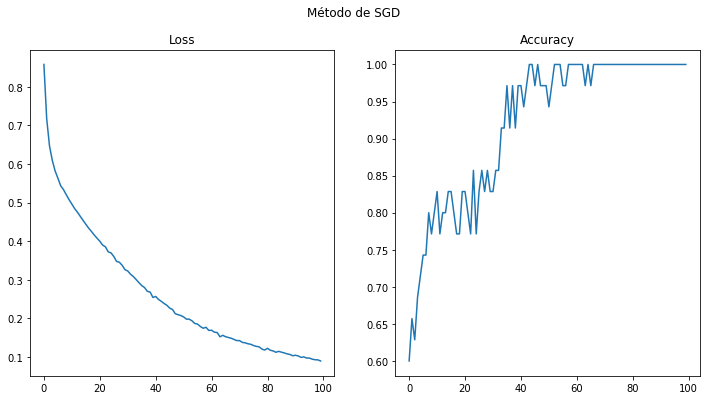

In [9]:
plt.figure(figsize=(12, 6)).suptitle('Método de SGD')
plt.subplot(121)
plt.plot(history1.epoch, history1.history['loss'])
plt.title('Loss')
plt.subplot(122)
plt.plot(history1.epoch, history1.history['acc'])
plt.title('Accuracy')
plt.show()

In [10]:
steps = 500
xx, yy = np.meshgrid(np.linspace(-8, 8, steps), np.linspace(-8, 8, steps))

xxyy = np.hstack((xx.reshape(steps*steps, 1), yy.reshape(steps*steps, 1)))
grid_prediction = np.argmax(net1.predict(xxyy), axis=1)
grid_prediction.shape = (steps, steps)

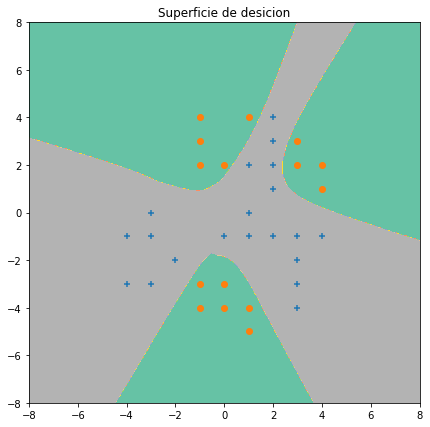

In [27]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction, cmap='Set2')
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Superficie de desicion')
plt.show()

### Método de momento

El parámetro del momento en las ecuaciones de la retropopagación es análogo a la masa de las particulas Newtonianas, que se mueven a traves de un medio viscoso en un campo de fuerza conservativo. El comportamiento del sistema cerca de un mínimo local es equivalente a un conjunto de osciladores armonicos amortiguados. Incluir el parámetro del momento mejora la velocidad de convergencia

La siguiente ecuación indica como se actualizan los parámetros de la red:

$$\nabla w_t = -\epsilon \nabla_w E(w_t) + p\nabla_{w_{t-1}} $$

La modificación del vector de pesos en un instante de tiempo dado depende del gradiente de la función de error en el instante presente y del cambio del vector de pesos en el instante anterior.

In [12]:
net2 = Sequential()
net2.add(Dense(30, activation='tanh', input_shape=(2,)))
net2.add(Dense(30, activation='relu'))
net2.add(Dense(2, activation='softmax'))

In [13]:
net2.compile(optimizer=SGD(lr=0.005, momentum=0.9), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [14]:
history2 = net2.fit(X, y_binary, epochs=100, batch_size=1, shuffle=True)

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.8349 - acc: 0.6571
Epoch 2/100
35/35 [==============================] - 0s 866us/step - loss: 0.6289 - acc: 0.7429
Epoch 3/100
35/35 [==============================] - 0s 813us/step - loss: 0.4897 - acc: 0.7429
Epoch 4/100
35/35 [==============================] - 0s 780us/step - loss: 0.4613 - acc: 0.7429
Epoch 5/100
35/35 [==============================] - 0s 657us/step - loss: 0.4188 - acc: 0.8286
Epoch 6/100
35/35 [==============================] - 0s 737us/step - loss: 0.3787 - acc: 0.8286
Epoch 7/100
35/35 [==============================] - 0s 774us/step - loss: 0.3186 - acc: 0.9143
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 0.3911 - acc: 0.9143
Epoch 9/100
35/35 [==============================] - 0s 910us/step - loss: 0.3379 - acc: 0.8286
Epoch 10/100
35/35 [==============================] - 0s 777us/step - loss: 0.2062 - acc: 0.9143
Epoch 11/100
35/35 [=======================

In [15]:
grid_prediction = np.argmax(net2.predict(xxyy), axis=1)
grid_prediction.shape = (steps, steps)

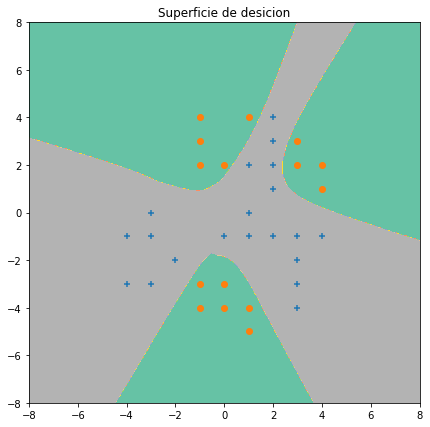

In [28]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction, cmap='Set2')
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Superficie de desicion')
plt.show()

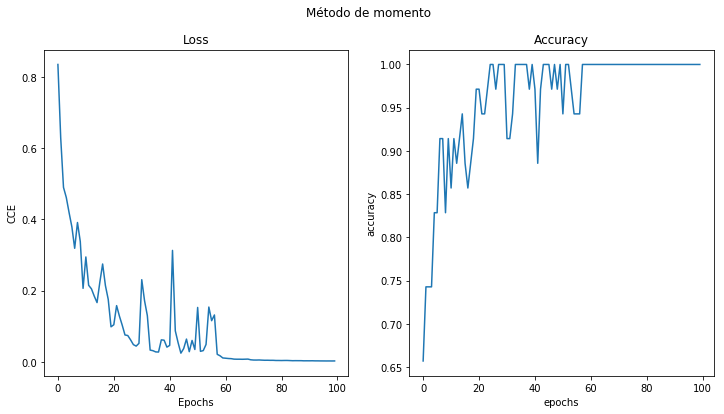

In [17]:
plt.figure(figsize=(12, 6)).suptitle('Método de momento')
plt.subplot(121)
plt.plot(history2.epoch, history2.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('CCE')
plt.subplot(122)
plt.plot(history2.epoch, history2.history['acc'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### Método de Levenberg-Marquardt

El algoritmo de Levenberg-Marquardt puede ser visto como una regularización del método de Gauss-Newton, donde un párametro de regularización es actualizado en cada iteración, controlando indirectamente el tamaño del paso, haciendo asi que converga globalmente independientemente del punto de inicio.

$$\nabla w_{t+1} = -(H+\lambda diag[H])^{-1} \nabla E(w_t)$$

$$H(x) = \nabla^2f(x) = J(x)^TJ(x)$$

El parámetro $\lambda$ se actualiza tomando en cuenta el siguiente criterio:

1. Actualizar pesos
2. Calcular el error (MSE)
3. Si el error es menor al anterior, aceptar el paso y decrementar $\lambda$ en un factor $\mu$
4. 3. Si el error es mayor que el anterior, rechazar el paso e incrementar $\lambda$ en un factor $\mu$

In [18]:
net3 = algorithms.LevenbergMarquardt(
    [
        layers.Input(2),
        layers.Tanh(30),
        layers.Relu(30),
        layers.Softmax(2)
    ],
    mu = 0.1, 
    mu_update_factor = 1.2,
    error = 'mse',
    shuffle_data = True,
)

In [19]:
net3.train(X, y_binary, epochs=50)

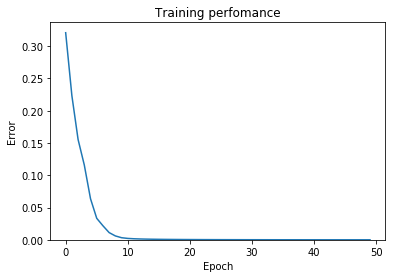

In [20]:
_ = plots.error_plot(net3)

In [21]:
grid_prediction3 = np.argmax(net3.predict(xxyy), axis=1)
grid_prediction3.shape = (steps, steps)

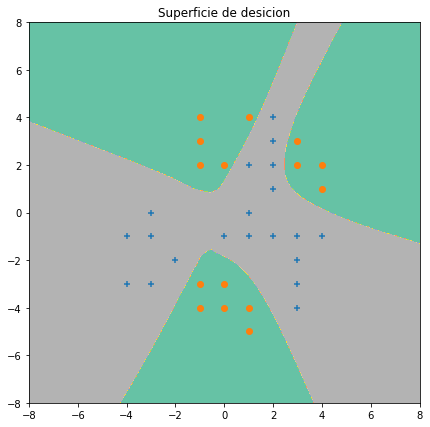

In [29]:
plt.figure(figsize=(7,7))
plt.contourf(xx, yy, grid_prediction3, cmap='Set2')
plt.scatter(x1[:,0], x1[:,1], marker='+')
plt.scatter(x2[:,0], x2[:,1], marker='o')
plt.title('Superficie de desicion')
plt.show()

### Referencias

1. Qian, Ning, On the momentum term in gradient descent learning algorithms: [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.57.5612&rep=rep1&type=pdf ]
2. Ranganatha, Ananth, The Levenberg-Marquardt algorithm: [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.10.2258&rep=rep1&type=pdf ]
3. Ruder, Sebastian, An overview of gradient descent optimizartion algorithms: [https://arxiv.org/pdf/1609.04747.pdf ]
4. Weight inicialization: [https://medium.com/usf-msds/deep-learning-best-practices-1-weight-initialization-14e5c0295b94 ]
5. Momentum: https://www.youtube.com/watch?v=k8fTYJPd3_I